In [1]:
'''
读取江淮汽车2022年年报PDF文件,进行词频统计，通过词频统计画词云和柱形图
'''
import wordcloud
import matplotlib.pyplot as plt
import pdfplumber
import jieba
import string

In [2]:
pdf = pdfplumber.open('江淮汽车2022年年度报告.pdf')
pages = pdf.pages
text_all = []
for page in pages:
    text = page.extract_text()
    text_all.append(text)
paper = ''.join(text_all)
pdf.close()

In [3]:
words = jieba.lcut(paper)
counts = {}
# 为每个词计数
for word in words:
    if word not in counts:
        counts[word] = 1
    else:
        counts[word] += 1

chinese_punctuation = '，。！？；：‘’“”（）【】《》〈〉「」『』〔〕—…－·、`√1234567890 □' # 中文标点符号和数字
for punctuation in string.punctuation + chinese_punctuation:
    try:
        del counts[punctuation]  # 删除标点符号
    except:
        continue
del counts['\n']  # 删除换行符

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\33249\AppData\Local\Temp\jieba.cache
Loading model cost 0.881 seconds.
Prefix dict has been built successfully.


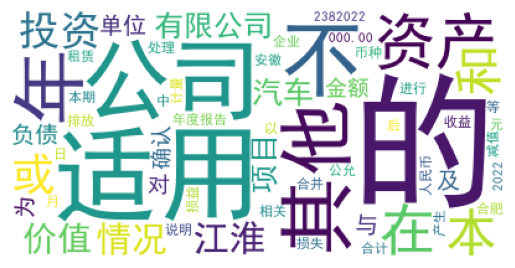

In [4]:
# 绘制词云
wc = wordcloud.WordCloud(
    font_path = 'simhei.ttf',  # 中文字体文件
    repeat=False,  # 词语不重复
    background_color = 'white',  # 背景颜色
    max_words = 100,  # 最大词语数量
    max_font_size = 120,  # 最大字体
    min_font_size = 10,  # 最小字体
)
wc.generate_from_frequencies(counts)
plt.imshow(wc)
plt.axis('off')  # 取消坐标轴
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

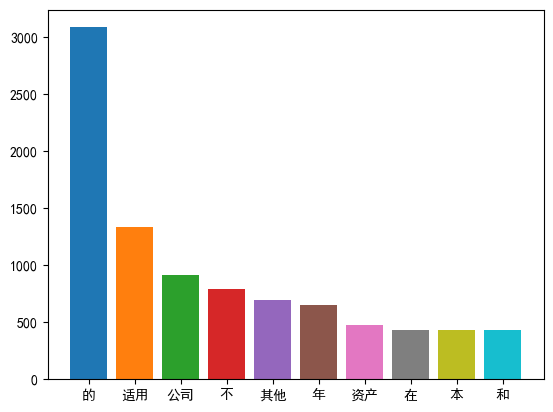

In [5]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 中文字体
items = list(counts.items())
items.sort(key=lambda x:x[1], reverse=True)  # 从大到小排序
for item in items[:10]:
    word = item[0]
    number = item[1]
    plt.bar(word, number)
plt.show